In [34]:
# Leemos los datos y separamos las columnas
import pandas as pd
import numpy as np
import sklearn as sk

In [35]:
df = pd.read_csv('Data/Estrategias.csv')
print (df.shape)

# Cargamos las predicciones
df_pred = pd.read_csv('Predicciones.csv')
print(df_pred.shape)

# Ahora, tenemos con predicciones una tabla de idCredito y su prediccion de clase, entonces hagamos un diccionario con todos los valores de idCredito y su prediccion
predicciones = df_pred.set_index('idCredito')['prediccion'].to_dict()

# Utilizando el diccionario, apliquemos a la base de datos una nueva columna dependiendo de su valor de idCredito
df['prediccion'] = df['idCredito'].map(predicciones)

# Ordenamos los datos por la columna de idCredito
df = df.sort_values(by='idCredito')

(2114172, 15)
(28602, 2)


In [36]:
# Ahora generamos un sample del 10% de los datos
df_sample = df.sample(frac=0.01, random_state=10)

In [37]:
# Vemos el tamaño del sample
print(df_sample.shape)

(21142, 15)


In [38]:
# Utilizando el sklearn, generamos 2 bolas en base a las proporciones de las muestras en las clases
# Primero vemos la proporción de las clases
print(df_sample['prediccion'].value_counts(normalize=True))

prediccion
0    0.958566
1    0.041434
Name: proportion, dtype: float64


In [44]:
# Separamos los datos en base a la variable estrategia
df_sample_estrategia = df_sample.groupby('Estrategia')
# Imprimamos que porcentaje de los datos tiene cada estrategia
print(df_sample_estrategia.size() / df_sample.shape[0])
# Ahora separamos los valores entre las predicciones
true_data = df_sample[df_sample['prediccion'] == 1]
false_data = df_sample[df_sample['prediccion'] == 0]
# Imprimimos las proporciones igual que antes pero por estrategia
print(true_data.groupby('Estrategia').size() / true_data.shape[0])
print(false_data.groupby('Estrategia').size() / false_data.shape[0])

Estrategia
BANAMEX CLABE TRADICIONAL           0.010453
BANORTE CLABE TRADICIONAL           0.002554
BBVA CLABE INTERBANCARIA            0.069199
SANTANDER CLABE TRADICIONAL         0.024974
SANTANDER TRADICIONAL REINTENTO     0.005014
dtype: float64
Estrategia
BANAMEX CLABE TRADICIONAL           0.252283
BBVA CLABE INTERBANCARIA            0.257991
SANTANDER TRADICIONAL REINTENTO     0.121005
dtype: float64
Estrategia
BANORTE CLABE TRADICIONAL      0.002665
BBVA CLABE INTERBANCARIA       0.061038
SANTANDER CLABE TRADICIONAL    0.026053
dtype: float64


In [40]:
# Ahora creamos dos bolas con la proporción de las clases
from sklearn.datasets import make_blobs
# Asignamos el tama;o en base a len(df_sample) * proporción de la clase
first_blob_size = int(len(df_sample) * df_sample['prediccion'].value_counts(normalize=True)[0])
second_blob_size = int(len(df_sample) * df_sample['prediccion'].value_counts(normalize=True)[1])
# Generamos el primer blob
X1, y1 = make_blobs(n_samples=first_blob_size, centers=1, cluster_std=0.5, random_state=0)
X2, y2 = make_blobs(n_samples=second_blob_size, centers=1, cluster_std=0.5, random_state=0)
# Sumemos las coordenadas extra de (+1, +1) a los blobs
X1 = X1 + np.array([3, 3])

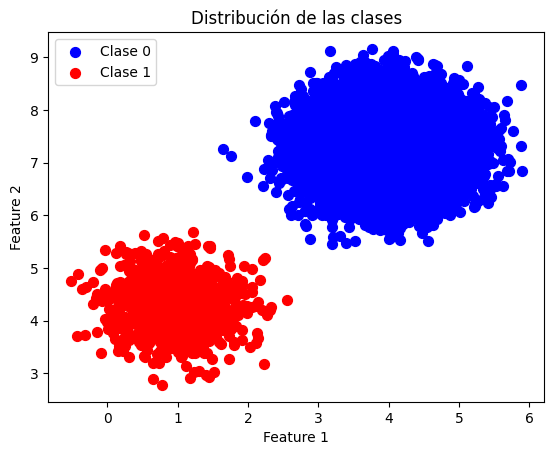

In [41]:
# Visualizamos los blobs
import matplotlib.pyplot as plt
plt.scatter(X1[:, 0], X1[:, 1], s=50, c='blue', label='Clase 0')
plt.scatter(X2[:, 0], X2[:, 1], s=50, c='red', label='Clase 1')
plt.title('Distribución de las clases')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
# Ahora en base a este formato 
"""
1 : {
    x : [x1,x2,x3],
    y : [y1,y2,y3],
    ponderacion : [estrategia1, estrategia2, estrategia3, ...],
}
"""
# Creamos un diccionario para guardar los blobs
blobs = {}

# Creamos un blob para la clase 0
ponderacion_true = true_data.groupby('Estrategia').size() / true_data.shape[0]
blobs[0] = {
    'x': X1[:, 0].tolist(),
    'y': X1[:, 1].tolist(),
    'ponderacion': ponderacion_true.to_dict()
}

# Creamos un blob para la clase 1
ponderacion_false = false_data.groupby('Estrategia').size() / false_data.shape[0]
blobs[1] = {
    'x': X2[:, 0].tolist(),
    'y': X2[:, 1].tolist(),
    'ponderacion': ponderacion_false.to_dict()
}

# Imprimimos los blobs
print(blobs)

{0: {'x': array([4.68114716, 4.32716176, 4.6024165 , ..., 4.18945353, 4.15641566,
       4.14079688]), 'y': array([6.8966106 , 7.34043004, 7.9184297 , ..., 7.31288866, 7.50710104,
       7.28049115]), 'ponderacion': {'BANAMEX CLABE TRADICIONAL': 0.2522831050228311, 'BBVA CLABE INTERBANCARIA': 0.2579908675799087, 'SANTANDER TRADICIONAL REINTENTO ': 0.12100456621004566}}, 1: {'x': array([ 5.74699385e-01,  5.97334648e-01, -3.00224829e-01,  1.09029674e+00,
        7.56675318e-01,  1.24792602e+00,  6.91614052e-01,  5.45657236e-01,
        2.73288620e-01,  7.99554204e-01,  9.16066759e-01,  1.08040757e+00,
        1.20251462e+00,  6.93050152e-01,  1.12502726e+00,  8.94642604e-01,
        8.21712856e-01,  8.65031573e-01,  2.90890087e-01,  9.92814954e-01,
        6.16299812e-01,  4.83514710e-01,  7.93923306e-01,  1.07270206e+00,
       -4.12409494e-01,  9.56636083e-01,  5.93418981e-01,  1.35851881e+00,
        7.82192982e-01,  8.42268393e-01,  2.03466559e+00,  1.42390021e+00,
        5.74565246